# visualize optuna

In [10]:
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from train import *
import os
import datetime
from collections import Counter
from itertools import product
import random
import matplotlib.pyplot as plt
import statistics
import optuna
from sklearn.model_selection import cross_val_score
from scipy.sparse import csr_matrix, save_npz, load_npz
import joblib
# import shap
# shap.initjs()
# optuna.visualization.matplotlib.plot_optimization_history(study)
import matplotlib.font_manager
matplotlib.font_manager.fontManager.addfont("/home/materialsinformatics/anaconda3/envs/py39torch/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/arial.ttf")
plt.rcParams['figure.subplot.bottom'] = 0.2 # 見切れ防止
plt.rcParams['figure.subplot.left'] = 0.2 # 見切れ防止
plt.rcParams['font.family'] ='Arial'#使用するフォント
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 18 #フォントの大きさ
# plt.figure(figsize=(4,4))

In [6]:
def optuna_history(model, split,  fill):
    study = optuna.load_study(study_name = f"all_{model}_{split}_oliynyk_{fill}",
                              storage='sqlite:///data/model/hyperopt/all_optuna_study_attempt.db')
    df = study.trials_dataframe()
    df_dropna = df.dropna().reset_index(drop = True)
    df_dropna["number"] = df_dropna.index + 1
    df_dropna.to_csv(f"data/model/hyperopt/optuna_study_all_{model}_{split}_oliynyk_{fill}.csv")
    df_dropna["best_value"] = np.nan
    df_dropna["best_value"][0] = df_dropna["value"][0]
    for i in range(len(df_dropna) - 1):
        if df_dropna["value"][i+1] < df_dropna["best_value"][i]:
            df_dropna["best_value"][i+1] = df_dropna["value"][i+1]
        else:
            df_dropna["best_value"][i+1] = df_dropna["best_value"][i]
            
    fig,ax = plt.subplots()
    ax.set_facecolor("white")
    plt.scatter(df_dropna["number"], df_dropna["value"], color = "blue", label="objective value")
    plt.plot(df_dropna["number"], df_dropna["best_value"], color = "red", label = "best value")
    plt.rcParams['font.family'] ='Arial'
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['font.size'] = 16
    plt.xlabel("Trial number", labelpad =1)
    plt.ylabel('Validation MSE (%$^2$)', verticalalignment='top', labelpad =20)
    plt.legend(edgecolor='black')
    plt.tight_layout()
    plt.savefig(f"data/model/hyperopt/optuna_history_all_{model}_{split}_oliynyk_{fill}.png", dpi=300)

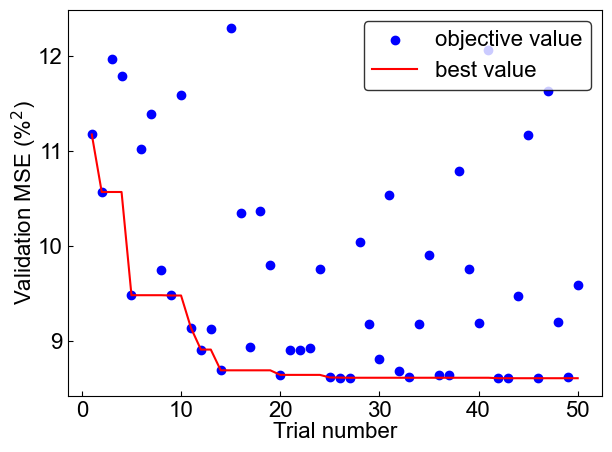

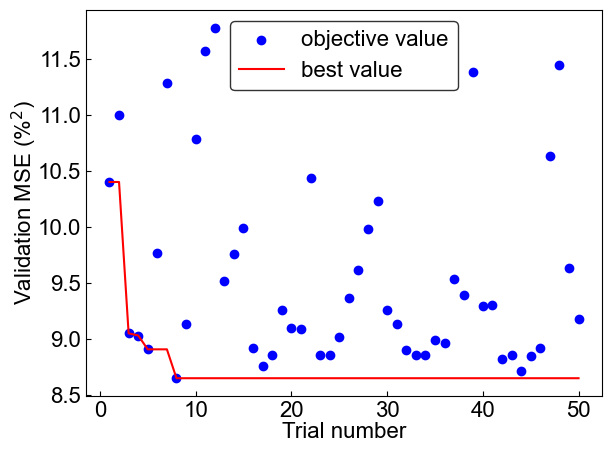

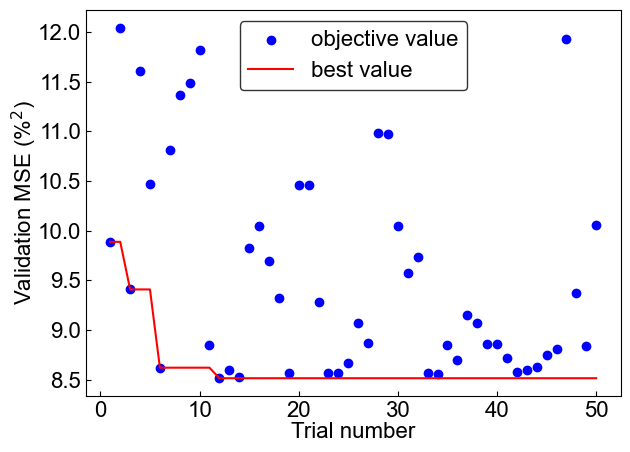

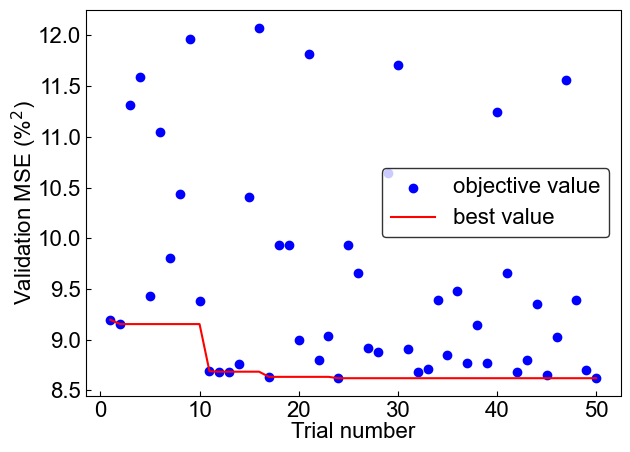

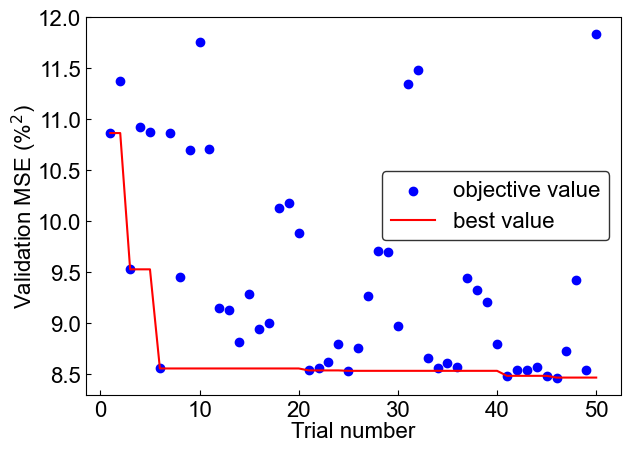

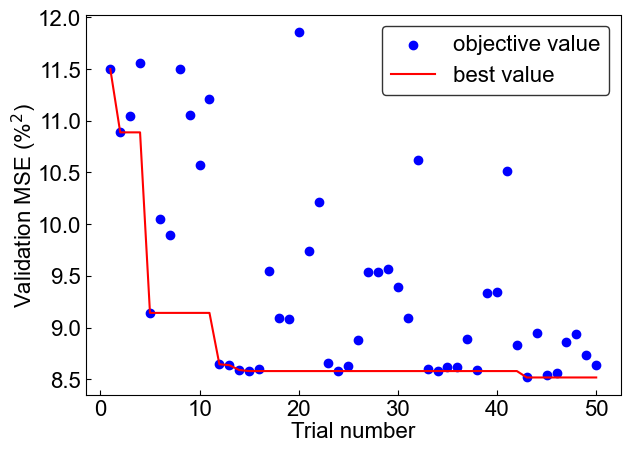

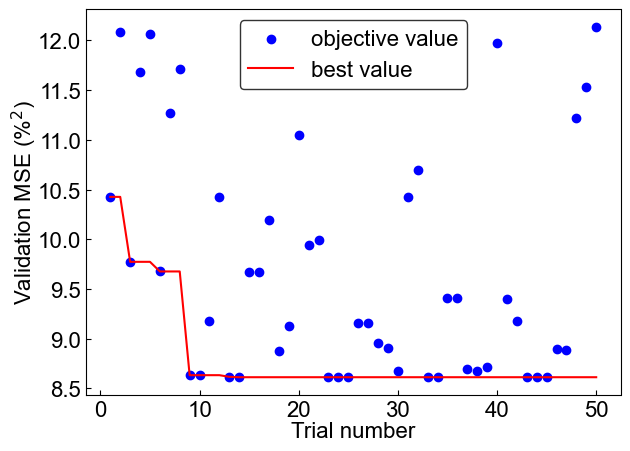

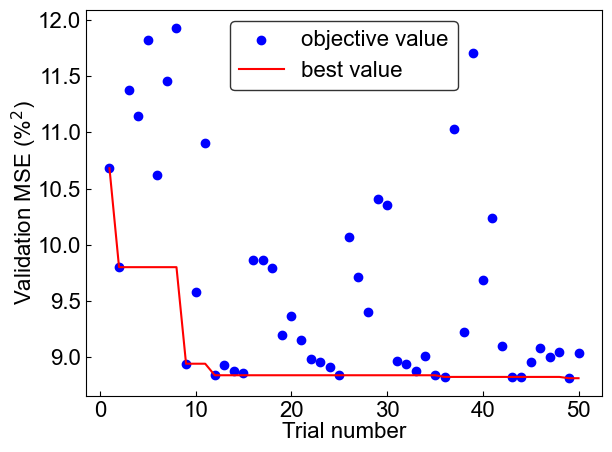

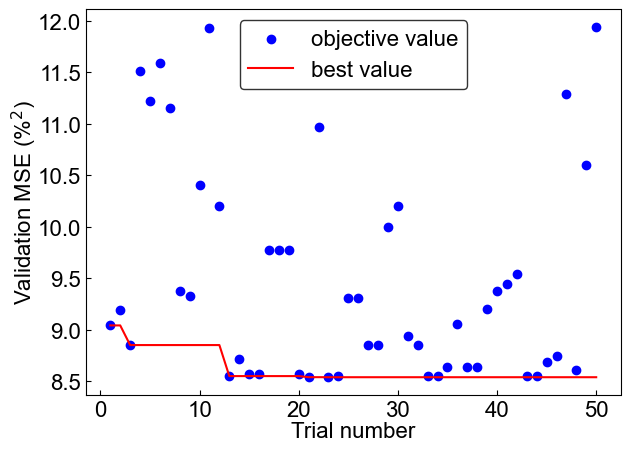

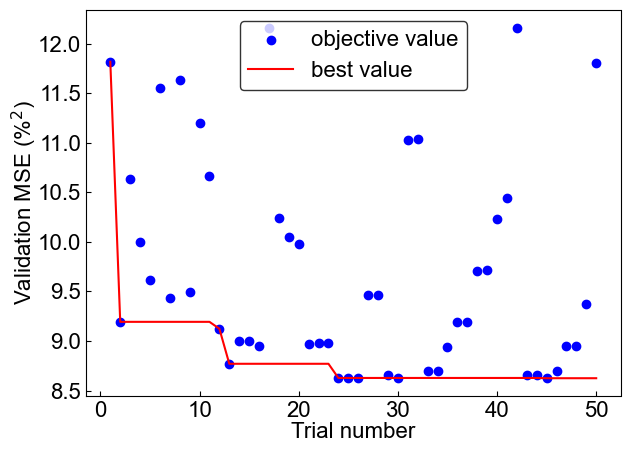

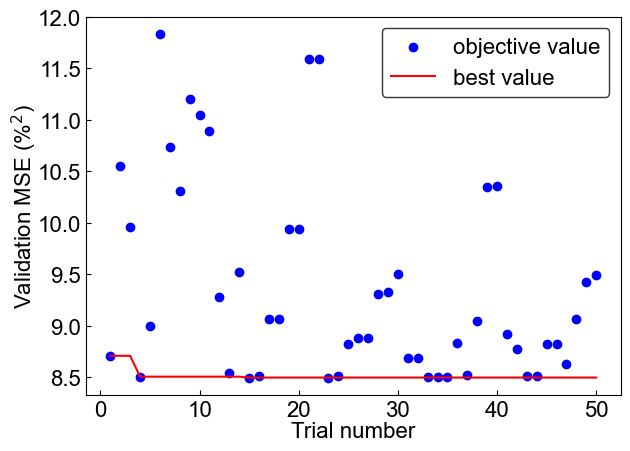

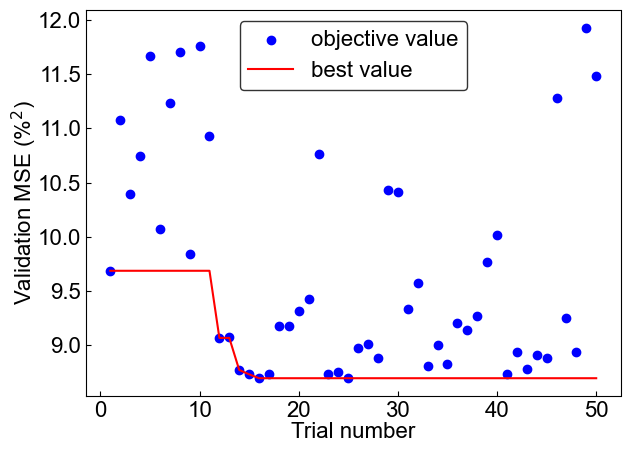

In [7]:
for split in ["sp0", "sp1", "sp2", "sp3"]:
    for fill in ["dummy", "zero", "median"]:
        optuna_history("RF", split, fill)

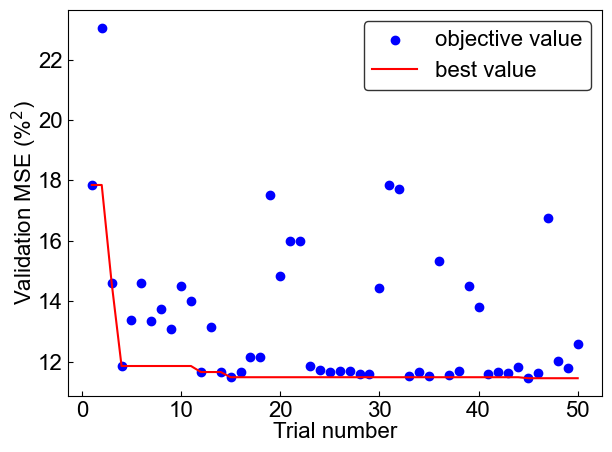

In [8]:
optuna_history("GBDT", "sp1", "zero")

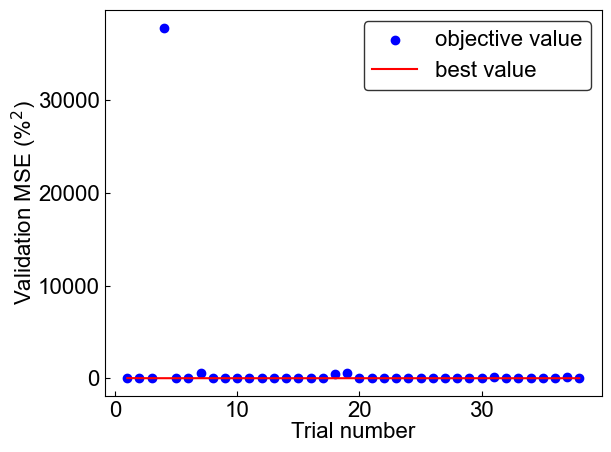

In [9]:
optuna_history("NN", "sp1", "zero")

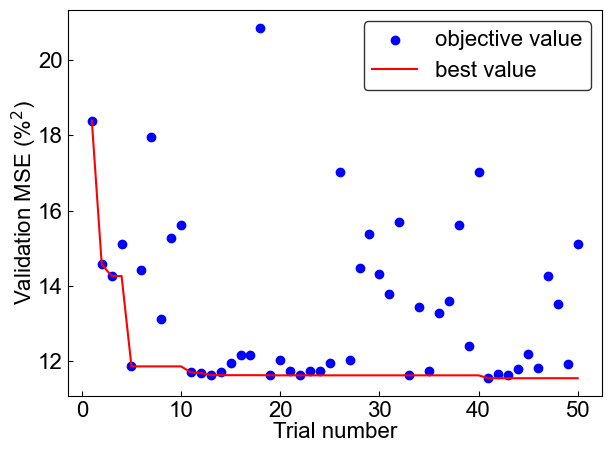

In [27]:
optuna_history("GBDT", "sp1", "zero")

In the case of the neural network, there were data points for which the loss function was abnormally large, so the vertical axis range to be displayed was restricted.

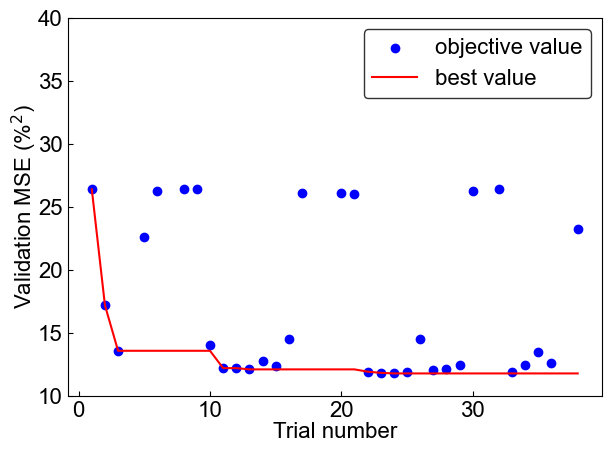

In [14]:
study = optuna.load_study(study_name = f"all_NN_sp1_oliynyk_zero",
                          storage='sqlite:///data/model/hyperopt/all_optuna_study_attempt.db')
df = study.trials_dataframe()
df_dropna = df.dropna().reset_index(drop = True)
df_dropna["number"] = df_dropna.index + 1
df_dropna.to_csv(f"data/model/hyperopt/optuna_study_all_NN_sp1_oliynyk_zero.csv")
df_dropna["best_value"] = np.nan
df_dropna["best_value"][0] = df_dropna["value"][0]
for i in range(len(df_dropna) - 1):
    if df_dropna["value"][i+1] < df_dropna["best_value"][i]:
        df_dropna["best_value"][i+1] = df_dropna["value"][i+1]
    else:
        df_dropna["best_value"][i+1] = df_dropna["best_value"][i]

fig,ax = plt.subplots()
ax.set_facecolor("white")
plt.scatter(df_dropna["number"], df_dropna["value"], color = "blue", label="objective value")
plt.plot(df_dropna["number"], df_dropna["best_value"], color = "red", label = "best value")
plt.rcParams['font.family'] ='Arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 16
plt.xlabel("Trial number", labelpad =1)
plt.ylabel('Validation MSE (%$^2$)', verticalalignment='top', labelpad =20)
plt.ylim([10,40])
plt.legend(edgecolor='black')
plt.tight_layout()
plt.savefig(f"data/model/hyperopt/optuna_history_all_NN_sp1_oliynyk_zero_limit.png", dpi=300)